Dataset used: Telco Customer Churn.

Objective: Explore churn patterns, find key factors, and prepare data for churn prediction models.

Business context: Telecom companies lose significant revenue due to churn → reducing churn improves profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#handling data type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
missing_total=df['TotalCharges'].isnull().sum()
print(f"Missing value after conversion::{missing_total}")

Missing value after conversion::11


In [10]:
df.dropna(subset=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
#cleaning whitespaces from catgorical columns
cat_cols=df.select_dtypes(include=["object"]).columns
for cols in cat_cols:
    df[cols]=df[cols].str.strip()
print("Data cleaning is done")
print(f"Shape after cleaning : {df.shape}")

Data cleaning is done
Shape after cleaning : (7043, 21)


In [12]:
#Separating Numerical Columns and Categorical Columns
numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols=df.select_dtypes(include=["object"]).columns.tolist()
print(f"Numerical columns : {numerical_cols}")
print(f"Categorical columns : {categorical_cols}")

Numerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
#visulaizing tenure with churn
bins=[0,6,24,df['tenure'].max()]
labels=['New(0-6)', 'Mid(7-24)','Loyal(25+)']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

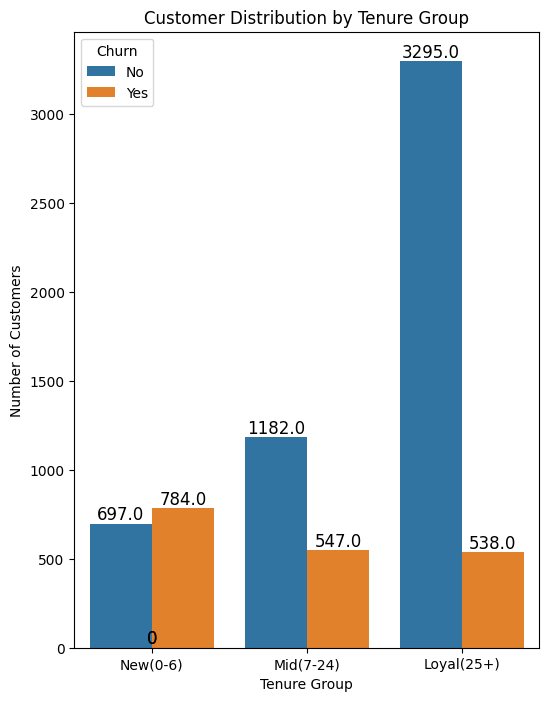

In [14]:
plt.figure(figsize=(6,8))
ax=sns.countplot(data=df,x=df['TenureGroup'],hue=df['Churn'])
for p in ax.patches:
    height = p.get_height()              
    ax.annotate(f'{height}',            
                (p.get_x() + p.get_width()/2, height),  
                ha='center', va='bottom', fontsize=12)
plt.title("Customer Distribution by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.show()

In [15]:
churn_percent = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100
churn_percent

/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_24391/2414007223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_percent = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
TenureGroup,,
New(0-6),47.062795,52.937205
Mid(7-24),68.363216,31.636784
Loyal(25+),85.963997,14.036003


Observation:: 1.People who joined for 0 to 6 months are more likely to be churn --> 52%. 2. People who are loyal(25+ months) -->14% churn

Observation : month-to-month subcriber are more likely to be churn 57.29%

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureGroup'],
      dtype='object')

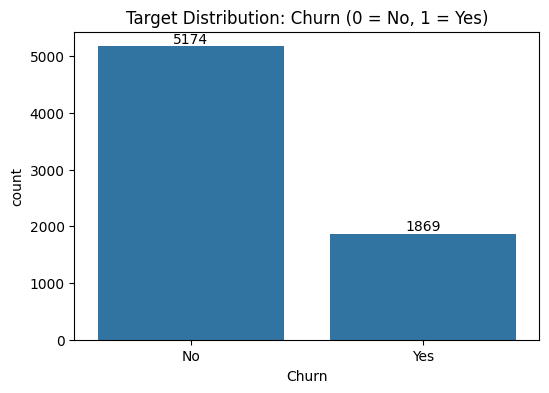

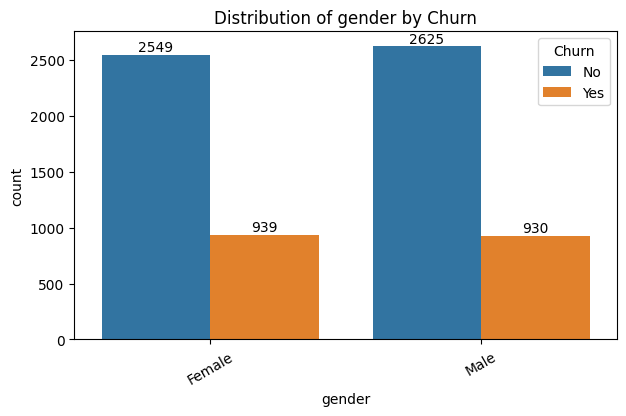

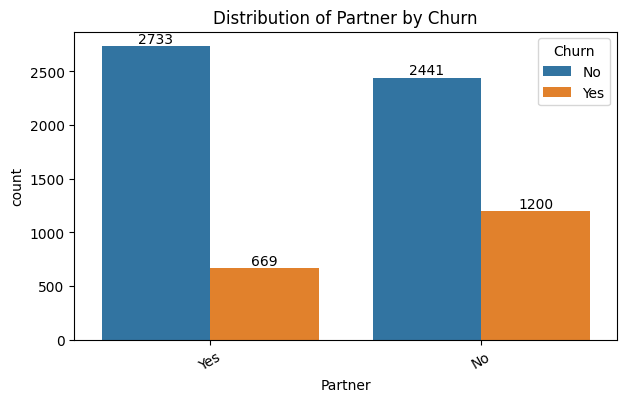

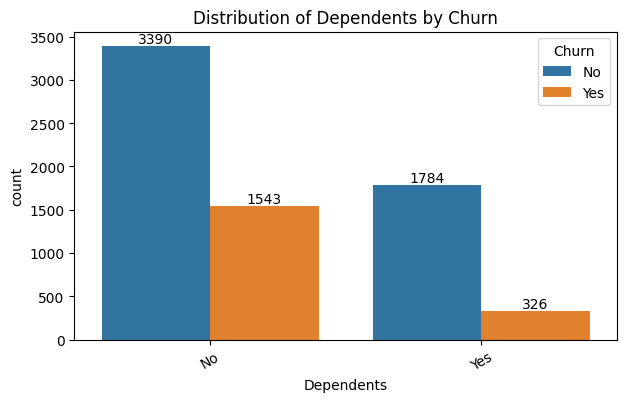

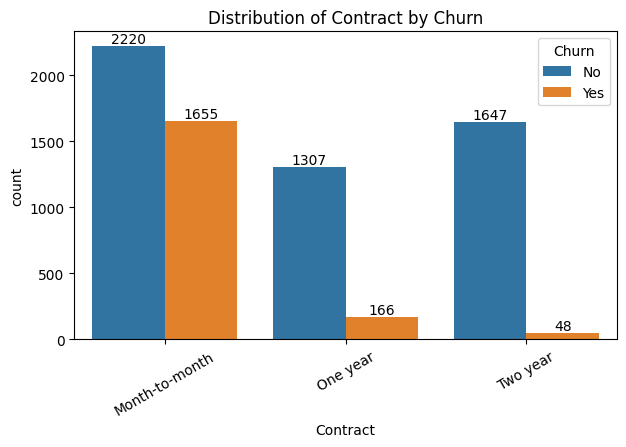

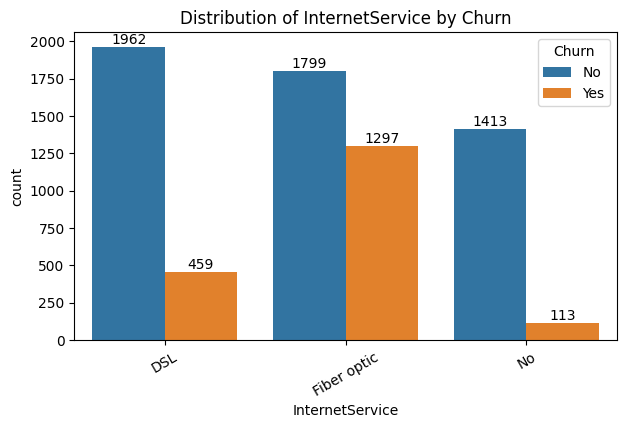

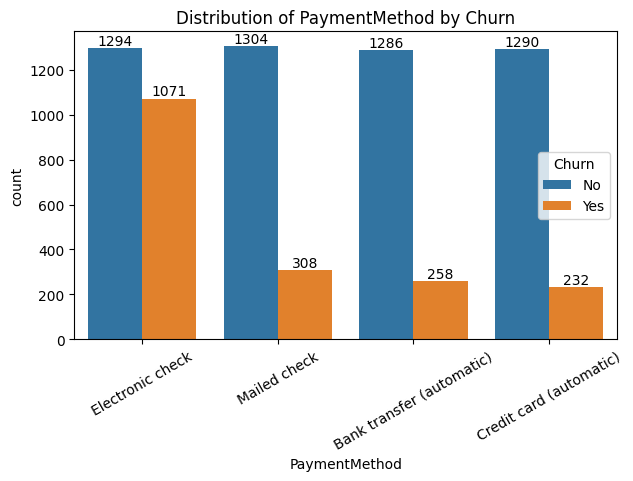

In [17]:
def countplot_with_churn(col, df, hue = "Churn", figsize = (7, 4)):
    plt.figure(figsize = figsize)
    ax = sns.countplot(data = df, x = col, hue = hue)
    plt.title(f"Distribution of {col} by {hue}")
    plt.xticks(rotation = 30)
    
    for container in ax.containers:
        labels = [str(int(bar.get_height())) for bar in container]
        ax.bar_label(container, labels = labels)
    plt.show()

plt.figure(figsize = (6, 4))
ax = sns.countplot(data = df, x = "Churn")
for container in ax.containers:
    labels = [str(int(bar.get_height())) for bar in container]
    ax.bar_label(container, labels = labels)
plt.title("Target Distribution: Churn (0 = No, 1 = Yes)")
plt.show()

cat_vars = ["gender", "Partner", "Dependents", "Contract", "InternetService", "PaymentMethod"]

for col in cat_vars:
    countplot_with_churn(col, df)


Observations: From above visulaizations we can say :
1.Customer churn is not related to gender
2.People without patner are slightly more churn 
3.People with month to month contract are more likely to churn. (42.70%)
4.People with no Internet service are not churn
5.People doing payment using electronic check are most likely to churn compare to othe payment method.

In [18]:
#percentage of churn by different Categorical Columns
def churn_percentage_by_columns(df, cols, churn_col='Churn'):
    results = {}
    for col in cols:
        churn_percent = (
            df.groupby(col)[churn_col].value_counts(normalize=True).unstack() * 100
        )
        results[col] = churn_percent
    return results

cols = ['Partner','Contract','InternetService','PaymentMethod']
churn_results = churn_percentage_by_columns(df, cols)

for col, table in churn_results.items():
    print(f"\nChurn percentage by {col}:")
    display(table) 



Churn percentage by Partner:


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903



Churn percentage by Contract:


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



Churn percentage by InternetService:


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980



Churn percentage by PaymentMethod:


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [19]:
#Numerical_columns 
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
df['Churn'] = df['Churn'].str.strip()      
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})   

print(df['Churn'].isna().sum())

0


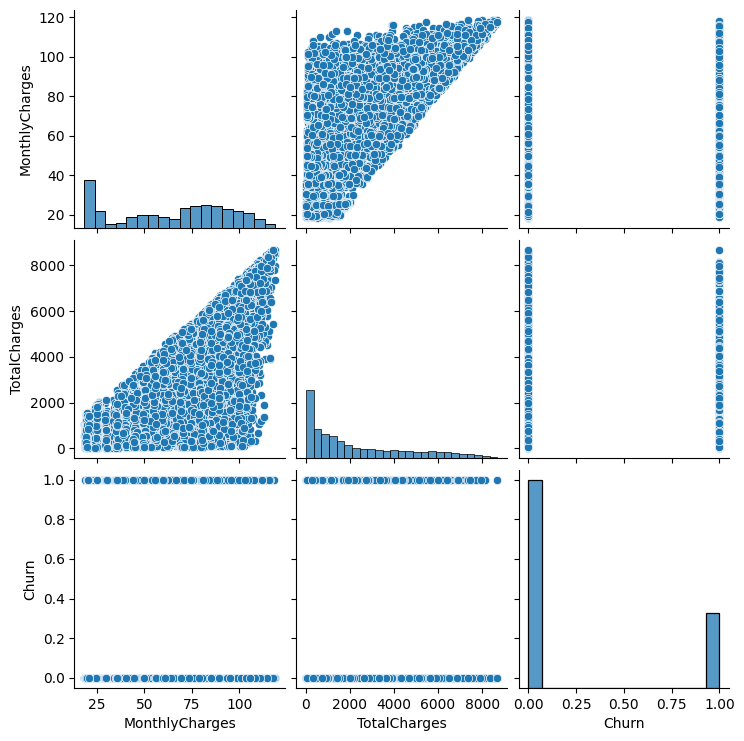

In [21]:
#Analyzing using Pairplot
sns.pairplot(data=df[['MonthlyCharges','TotalCharges','Churn']])

In [22]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureGroup          0
dtype: int64

In [23]:
#Filling NAN in TotalCharges by MonthlyCharges*tenure
total=df['MonthlyCharges']*df['tenure']
df['TotalCharges']=df['TotalCharges'].fillna(total)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureGroup         0
dtype: int64

In [24]:
#Analysis of Numerical Columns like MonthlyCharges and TotalCharges with Churn

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

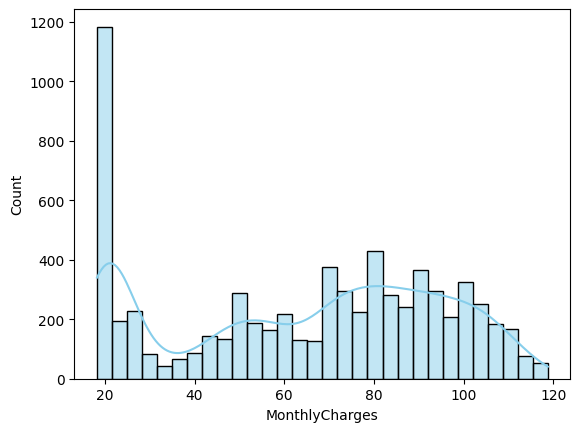

In [25]:
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color="skyblue")

In [26]:
churned=df[df['Churn']==1]
not_churned=df[df['Churn']==0]
print(f"Avg Monthly Charges of churned Customers:{churned['MonthlyCharges'].mean()}")
print(f"Avg Monthly Charges of not churned Customers:{not_churned['MonthlyCharges'].mean()}")

Avg Monthly Charges of churned Customers:74.44133226324237
Avg Monthly Charges of not churned Customers:61.26512369540008


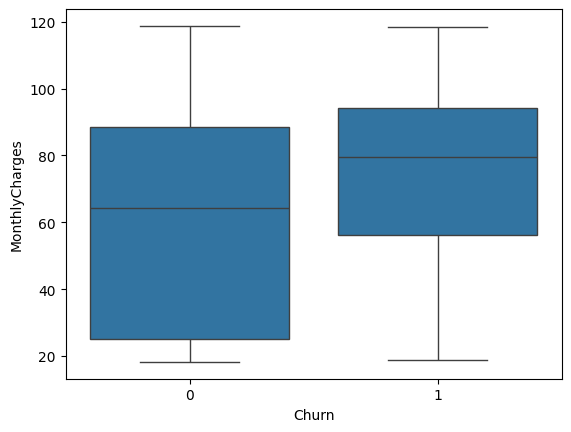

In [27]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

In [28]:
df['ChargeBin'] = pd.cut(df['MonthlyCharges'], bins=[0, 40, 70, 120])
print(df.groupby('ChargeBin')['Churn'].value_counts(normalize=True)*100)

ChargeBin  Churn
(0, 40]    0        88.356910
           1        11.643090
(40, 70]   0        76.078915
           1        23.921085
(70, 120]  0        64.638571
           1        35.361429
Name: proportion, dtype: float64


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_24391/1719026011.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('ChargeBin')['Churn'].value_counts(normalize=True)*100)


#Observation :: Customer paying more monthly are tend to churn more . A churned customer pay 13 rupee more than the non-churned one.
This Suggest that high monthly charges may be a reason of churn

In [29]:
#Correlation
df[['MonthlyCharges', 'TotalCharges', 'Churn']].corr()

,MonthlyCharges,TotalCharges,Churn
MonthlyCharges,1.000000,0.651174,0.193356
TotalCharges,0.651174,1.000000,-0.198324
Churn,0.193356,-0.198324,1.000000


<Axes: xlabel='TotalCharges'>

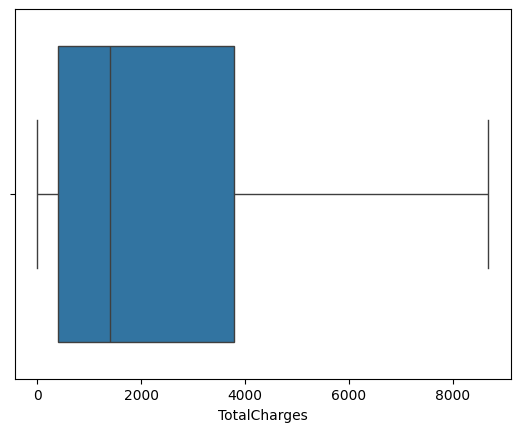

In [30]:
sns.boxplot(x=df['TotalCharges'])

<Axes: >

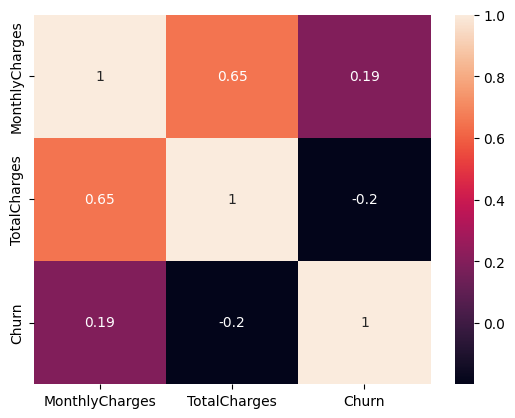

In [31]:
sns.heatmap(data=df[['MonthlyCharges','TotalCharges','Churn']].corr(),annot=True)

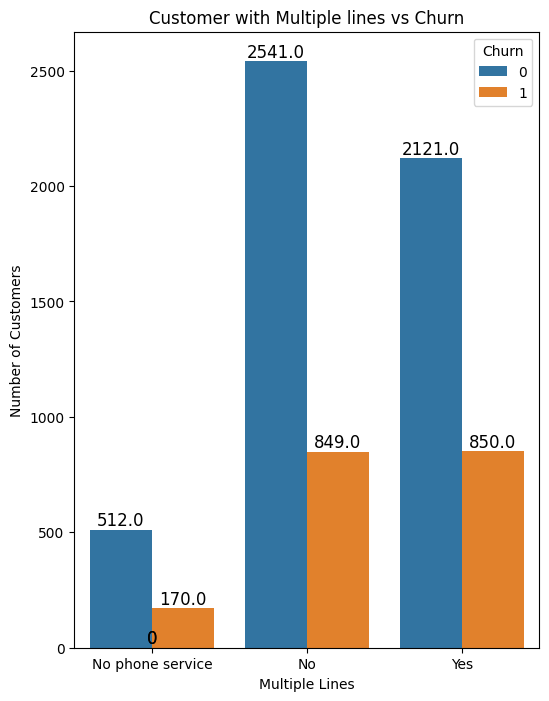

In [33]:
plt.figure(figsize=(6,8))
ax=sns.countplot(data=df,hue='Churn',x='MultipleLines')
for p in ax.patches:
    height = p.get_height()              
    ax.annotate(f'{height}',            
                (p.get_x() + p.get_width()/2, height),  
                ha='center', va='bottom', fontsize=12)
plt.xlabel("Multiple Lines")
plt.ylabel("Number of Customers")
plt.title("Customer with Multiple lines vs Churn")
plt.show()


In [34]:
df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()*100

Churn,0,1
MultipleLines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


Observation : Customer with Multiple Lines churned most(28.60%) among all three .

In [35]:
#Label Encoding for finding Feature Importance

In [36]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for col in categorical_cols:
    df[col]=label_encoder.fit_transform(df[col])

In [37]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeBin
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,29.85,0,New(0-6),"(0, 40]"
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1889.50,0,Loyal(25+),"(40, 70]"
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,New(0-6),"(40, 70]"
3,5535,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1840.75,0,Loyal(25+),"(40, 70]"
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,New(0-6),"(70, 120]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,1,1,3,84.80,1990.50,0,Mid(7-24),"(70, 120]"
7039,1525,0,0,1,1,72,1,2,1,0,...,2,2,1,1,1,103.20,7362.90,0,Loyal(25+),"(70, 120]"
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,1,2,29.60,346.45,0,Mid(7-24),"(0, 40]"
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,1,3,74.40,306.60,1,New(0-6),"(70, 120]"


In [38]:
from sklearn.ensemble import RandomForestClassifier
X=df.drop(columns=['Churn','customerID','TenureGroup','ChargeBin'])
y=df['Churn']

In [39]:
#Training the model
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
#Feature importances
importances=rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
18,TotalCharges,0.191563
17,MonthlyCharges,0.179420
4,tenure,0.158077
14,Contract,0.076587
16,PaymentMethod,0.051265
11,TechSupport,0.044966
8,OnlineSecurity,0.044078
7,InternetService,0.027620
0,gender,0.027501
9,OnlineBackup,0.026636


/var/folders/m9/c2d1d_mj2498cks2v5q2fgz40000gn/T/ipykernel_24391/224681758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df,x="Importance",y="Feature",palette='dark')


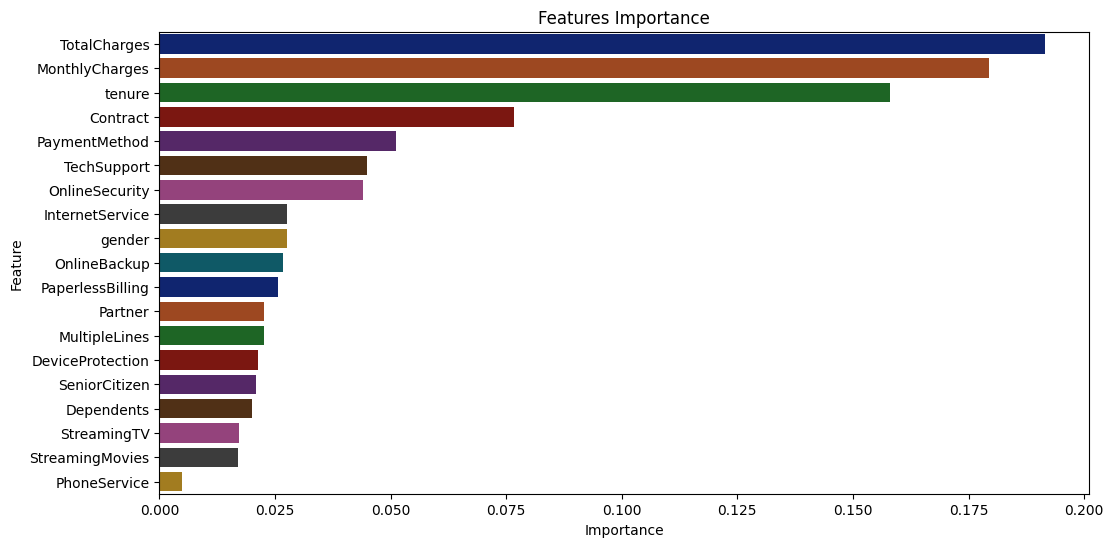

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance_df,x="Importance",y="Feature",palette='dark')
plt.title("Features Importance")
plt.show()

Conclusion

1.Features like Total Charges, Monthly Charges, Tenure,Contract and payment method affect churn more.

2.Customers with month-to-month contracts and electronic check payments are most likely to churn.

3.Senior citizens and customers with high monthly charges show higher churn rates.

4.Loyal customers (tenure > 24 months) are less likely to churn.

5.There is no as such difference of churn and non churn customer by gender.

6.Average of Monthly charges are 13 rupees more of churned customers . So high monthly charges can be a reason of churn.

In [ ]:
df.to_csv("Cleaned_telecom_data.csv")

In [43]:
max(df['MonthlyCharges'])

118.75